## Credit card fraud detection

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed_value = 42
sns.set_palette('coolwarm')

data_csv = pd.read_csv('../data/creditcard.csv')
data_csv['normAmount'] = StandardScaler().fit_transform(np.array(data_csv['Amount']).reshape(-1, 1))
data_csv = data_csv.drop(['Time', 'Amount'], axis=1)

data_csv.head().T

### Under-sampling

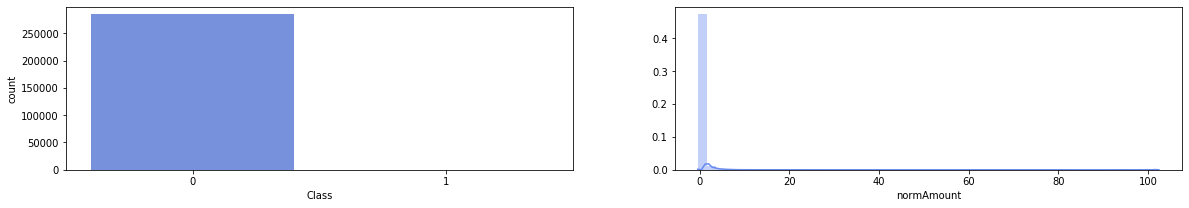

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20, 3))
sns.countplot(data_csv['Class'], ax=axs[0]);
sns.distplot(data_csv['normAmount'], ax=axs[1]);

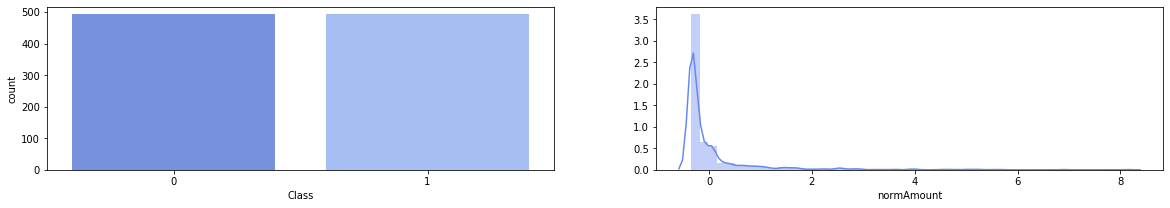

In [35]:
# Undersample so that we have equal (50/50) distribution between classes
minority_samples = data_csv[data_csv.Class == 1]
majority_samples = data_csv[data_csv.Class == 0].sample(n=minority_samples.shape[0], random_state=seed_value)

df_sampled = pd.concat([majority_samples, minority_samples])
df_sampled = df_sampled.sample(frac=1).reset_index(drop=True)

# Plot distribution again
fig, axs = plt.subplots(1, 2, figsize=(20, 3))
sns.countplot(df_sampled['Class'], ax=axs[0]);
sns.distplot(df_sampled['normAmount'], ax=axs[1]);

In [36]:
X = df_sampled.drop('Class', axis=1).copy()
y = df_sampled.Class.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=seed_value)

print(X_train.shape, X_valid.shape, X_test.shape)

del X
del y

(527, 29) (260, 29) (197, 29)


### Logistic Regression

In [37]:
clf = LogisticRegression()
